# Technical Research Notebook

*This page will contain useful code snippets and descriptions*

### JSON files

JSON files are the file format of choice for many types of data exchanges.

[JSON file format site](https://www.json.org/json-en.html)<br>
[Beginner's Guide to JSON (stack overflow article)](https://stackoverflow.blog/2022/06/02/a-beginners-guide-to-json-the-data-format-for-the-internet/)

---

### Personal Google Data Download

I downloaded my personal google data and began to explore what it can tell me. I started with my browser history, because it was the biggest file. Even without reading page content, URLs plus timestamps can reveal patterns such as daily schedule (sleep/wake/work patterns), work industry, health research, financial stress, religious affiliation, political leaning, relationship status, travel patterns, and mental health indicators. 

I used several python libraries to process the browser history date and create a dataframe. My Intro to Data Science class came in handy, because I was already introduced to the Pandas library in that course. In the code block below, pathlib and Path are imported to help transform strings into file paths. json is used to help parse the JSON file. numpy is used for math (ratios etc). Pandas is a popular data science library, as previously mentioned. re was imported for filtering with regex. urllib.parse and urlparse were used to process the URL field in the JSON file.

[Pandas Library Documentation](https://pandas.pydata.org/) <br>
[JSON Geeks for Geeks article](https://www.geeksforgeeks.org/python/python-json/)<br>
[JSON in Python documentation](https://docs.python.org/3/library/json.html)<br>
[Pathlib Geeks for Geeks article](https://www.geeksforgeeks.org/python/pathlib-module-in-python/)<br>
[Urllib Geeks for Geeks article](https://www.geeksforgeeks.org/python/python-urllib-module/)<br>
[re in Python documentation](https://docs.python.org/3/library/re.html)<br>
[Numpy Library Documentation](https://numpy.org/)<br>

In [7]:
from pathlib import Path
import json
import numpy as np
import pandas as pd
import re
from urllib.parse import urlparse

The output below is generate by running a python file for processing and doing a few initial calculations. Just from the timestamps, a pretty clear picture of when I sleep and work emerges. The entropy score has to do with the variety of domains visted, as does the repeat domain ratio. I will continue exploring this data as well as others in the google data download.<br><br>

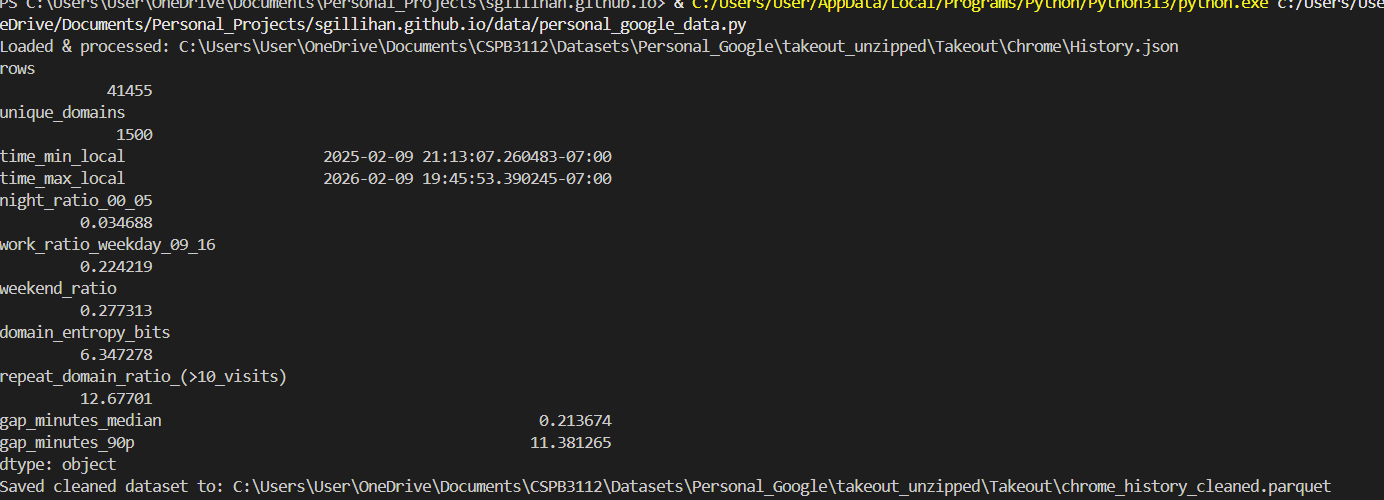

---

### Setting up json and csv processing
In my data science class, we never worked with large enough data sets to have to worry about running out of RAM to process the file. During my first attempt to proccess the HMDA data, I encountered errors due to the large file size. I had to rewrite my csv import tool to account for files so large that chunking is necessary. 

**chunking-** breaking the data into smaller pieces and processing it one piece at a time. Avoids memory errors.

**Example of using an aggregation pattern in combination with chunking:**

In [8]:
# total = 0
# count = 0

# for chunk in pd.read_csv("huge.csv", chunksize=100_000):
#     total += chunk["loan_amount"].sum()
#     count += chunk["loan_amount"].count()

# mean = total / count


**Filter + Combine Pattern with chunking**

In [9]:
# filtered = []

# for chunk in pd.read_csv("huge.csv", chunksize=100_000):
#     co_chunk = chunk[chunk["state_code"] == "CO"]
#     filtered.append(co_chunk)

# df = pd.concat(filtered, ignore_index=True)


**Write chunks to parquet files for working with later**

In [10]:
# for i, chunk in enumerate(pd.read_csv("huge.csv", chunksize=100_000)):
#     chunk.to_parquet(f"part_{i}.parquet")


---

### Robots.txt
Every website has a file called robots.txt. The robots.txt tells web scrapers what they can and cannot do. Ethical bots obey the robots.txt instructions, but some bots may try to disregard instructions.

Below are screenshots from the Amazon and Google robots.txt. You can see that Amazon does not want to allow AI bots to scrape any of their data.

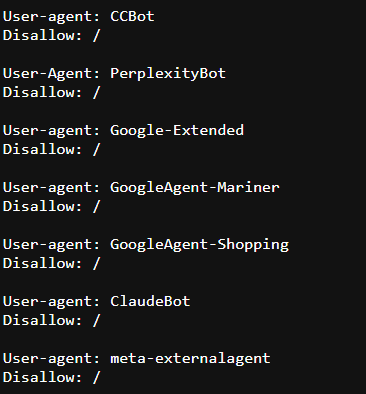

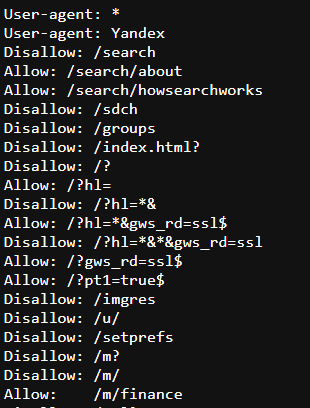

---

# Network Traffic Inspection Using Chrome DevTools

This exploration, guided by ChatGPT v 5.2, allowed me to explore network traffic on my Chrome browser to get a feel for the types of information 3rd parties can collect. I had never used Chrome DevTools before, so this was a very basic introduction to the tool. 

## Process
Using Chrome DevTools → **Network tab**:
- Open site in Incognito  
- Enable “Preserve log”  
- Add **Domain** column  
- Reload page  
- Identify third-party domains  
- Inspect request headers & query parameters  

## Key Observations  

### Data Leaving the Browser  

Visible in requests:

- Device information (OS, browser version)
- Language settings
- Session identifiers (`sid`, correlators, etc.)
- Page context (in some requests)
- Timing signals

Even in Incognito:
- No persistent cookies
- Session-level identifiers still present

### Encryption Insight  

- Traffic is encrypted **in transit (TLS/HTTPS)**
- DevTools displays decrypted request data before transmission
- Encryption does not prevent browser-level data sharing

## Proxy Research Implications  

- Metadata alone can support behavioral profiling  
- Session identifiers + device signals enable probabilistic linking  
- Cross-site ad ecosystems facilitate indirect aggregation  
- Users can observe outbound data, but not backend inference processes  

---
